<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

Клиентам «Мегалайн» предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
Описание тарифов
* Тариф «Смарт»
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей
* Тариф «Ультра»
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

Примечание
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

## Изучение данных из файла

### Таблица Calls

Сначала рассмотрим каждый датасет.
Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [2]:
import pandas as pd  #импортируем библиотеку pandas
calls = pd.read_csv('/datasets/calls.csv')
#calls = pd.read_csv('calls.csv')
calls.head(10) #посмотрим первые 10 строк датафрейма

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


### Таблица Users

Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

In [4]:
users = pd.read_csv('/datasets/users.csv')
#users = pd.read_csv('users.csv')
users.head(10) #посмотрим первые 10 строк датафрейма

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Таблица Messages

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [6]:
messages = pd.read_csv('/datasets/messages.csv')
#messages = pd.read_csv('messages.csv')
messages.head(10) #посмотрим первые 10 строк датафрейма

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### Таблица Internet

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [8]:
internet = pd.read_csv('/datasets/internet.csv')
#internet = pd.read_csv('internet.csv')
internet.head(10) #посмотрим первые 10 строк датафрейма

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


### Таблица Tariffs

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со - 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [10]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
#tariffs = pd.read_csv('tariffs.csv')
tariffs.head(10) #посмотрим первые 10 строк датафрейма

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Видим, что названия столбцов соотвествуют правилам названиям переменных. При помощи метода info() посмотрели информацию по каждому датасету. Также представили описание полей.

## Предобработка данных

Приведите данные к нужным типам;
Найдите и исправьте ошибки в данных, если они есть.
Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. 
Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

### Предобработка таблицы Calls

In [12]:
# начнем с таблицы calls. Дату звонка приведем к типу datetime, а продолжительность звонков к типу int, 
#округлив в большую сторону по заданию
import numpy as np
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [13]:
#Также добавим столбец с номером месяца
calls['month'] = calls['call_date'].dt.month

In [14]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


Судя по информации о таблице, пропусков в данных нет, проверим данные в таблице на аномалии. В случае продолжительности звонка аномальными можно считать отрицательные значения. Также надо рассмотреть значения месяцев.

In [15]:
calls[calls['duration'] < 0]['duration']

Series([], Name: duration, dtype: int64)

In [16]:
calls['month'].value_counts()

12    33987
11    29501
10    27146
9     24061
8     21488
7     18298
6     14716
5     12647
4      9272
3      6687
2      3328
1      1476
Name: month, dtype: int64

Аномальных значений нет. Перейдем к следующей таблице. В таблице messages также датуприведем к типу datetime и добавим столбец с месяцем.

### Предобработка таблицы Messages

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [18]:
messages['month'].value_counts()

12    20555
11    18244
10    17114
9     14759
8     13088
7     11320
6      8983
5      7298
4      5179
3      3648
2      1924
1       924
Name: month, dtype: int64

### Предобработка таблицы Internet

В таблице internet также дату приведем к типу datetime и добавим столбец с месяцем.

In [19]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


In [20]:
internet['month'].value_counts()

12    24799
11    21817
10    20009
9     17512
8     16092
7     13548
6     11057
5      9408
4      6511
3      4885
2      2641
1      1117
Name: month, dtype: int64

In [21]:
internet[internet['mb_used'] < 0]['mb_used'] #проверим на аномалии

Series([], Name: mb_used, dtype: float64)

In [22]:
#удалим также столбец Unnamed: 0
internet = internet.drop(['Unnamed: 0'],axis = 1)
internet.columns

Index(['id', 'mb_used', 'session_date', 'user_id', 'month'], dtype='object')

### Предобработка таблицы Users

In [23]:
#В таблице users приведем даты регистрации и прекращения пользования тарифом к типу datetime, 
#а также проверим на аномалии столбцы age и tariff 
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [24]:
users[users['age'] < 18]['age'] #проверим на аномалии

Series([], Name: age, dtype: int64)

In [25]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [26]:
users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Химки               1
Архангельск         1
Подольск            1
Нижневартовск       1
Иваново             1
Name: city, Length: 76, dtype: int64

In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [28]:
# Проверим, нет ли случаев, когда дата отказа от тарифа раньше даты регистрации
users[users['churn_date'] < users['reg_date']]['reg_date'] # 

Series([], Name: reg_date, dtype: datetime64[ns])

### Проверка на наличие дубликатов

Проверим получившиеся таблицы на полные дубликаты.

In [29]:
display(calls.duplicated().sum()) #используем метод duplicated для определения наличия дубликатов
display(messages.duplicated().sum())
display(internet.duplicated().sum())
display(users.duplicated().sum())

0

0

0

0

Дубликатов нет, можем перейти к следующему этапу. Проверить на неявные дубликаты?

## Расчёты и добавление результатов в таблицу

Посчитайте для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

### Расчет израсходованных минут по месяцам

In [30]:
#Cгруппируем таблицу calls по пользователям и месяцам, чтобы посчитать количество сделанных звонков и израсходованных минут 
#разговора по месяцам
calls_grouped = calls.groupby(by = ['user_id','month']).agg({'duration':['sum','count']})
calls_grouped.columns  = ['month_calls_duration','month_calls_qty']

In [31]:
calls_grouped.head(10)

month_calls_duration  month_calls_qty
user_id month                                       
1000    5                       159               22
        6                       172               43
        7                       340               47
        8                       408               52
        9                       466               58
        10                      350               57
        11                      338               43
        12                      333               46
1001    11                      430               59
        12                      414               63

### Расчет израсходованных сообщений по месяцам

In [32]:
#Cгруппируем таблицу messages по пользователям и месяцам, чтобы посчитать количество отправленных сообщений по месяцам 
messages_grouped = messages.groupby(by = ['user_id','month']).agg({'id':'count'})
messages_grouped.columns  = ['month_messages']
messages_grouped.head(10)

month_messages
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
        10                 73
        11                 58
        12                 70
1002    6                   4
        7                  11

### Расчет интернет-траффика по месяцам

In [33]:
#Cгруппируем таблицу internet по пользователям и месяцам, чтобы посчитать объем израсходованного интернет-трафика по месяцам
internet_grouped = internet.groupby(by = ['user_id','month']).agg({'mb_used':'sum'})
internet_grouped.columns  = ['month_internet']
internet_grouped.head(10)

month_internet
user_id month                
1000    5             2253.49
        6            23233.77
        7            14003.64
        8            14055.93
        9            14568.91
        10           14702.49
        11           14756.47
        12            9817.61
1001    11           18429.34
        12           14036.66

### Расчет ежемесячной выручки

Теперь рассчитаем помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану). Для этого нам нужно объединить агрегированные данные по интеренету, звонкам и сообщениям.

In [34]:
revenue_users = calls_grouped.merge(messages_grouped, on=['user_id','month'], how='outer').reset_index()
revenue_users = revenue_users.merge(internet_grouped, on=['user_id','month'], how='outer')

In [35]:
revenue_users.head(10)

,user_id,month,month_calls_duration,month_calls_qty,month_messages,month_internet
0,1000,5,159.0,22.0,22.0,2253.49
1,1000,6,172.0,43.0,60.0,23233.77
2,1000,7,340.0,47.0,75.0,14003.64
3,1000,8,408.0,52.0,81.0,14055.93
4,1000,9,466.0,58.0,57.0,14568.91
5,1000,10,350.0,57.0,73.0,14702.49
6,1000,11,338.0,43.0,58.0,14756.47
7,1000,12,333.0,46.0,70.0,9817.61
8,1001,11,430.0,59.0,NaN,18429.34
9,1001,12,414.0,63.0,NaN,14036.66


In [36]:
#Заменим пропущенные значения в столбцах полученной таблицы на 0, так как они означают. что какие-то функции не использовались
revenue_users = revenue_users.fillna(0)
revenue_users.head(10)

,user_id,month,month_calls_duration,month_calls_qty,month_messages,month_internet
0,1000,5,159.0,22.0,22.0,2253.49
1,1000,6,172.0,43.0,60.0,23233.77
2,1000,7,340.0,47.0,75.0,14003.64
3,1000,8,408.0,52.0,81.0,14055.93
4,1000,9,466.0,58.0,57.0,14568.91
5,1000,10,350.0,57.0,73.0,14702.49
6,1000,11,338.0,43.0,58.0,14756.47
7,1000,12,333.0,46.0,70.0,9817.61
8,1001,11,430.0,59.0,0.0,18429.34
9,1001,12,414.0,63.0,0.0,14036.66


In [37]:
#Для расчета выручки по пользователям нам также понадобится информация о том, какой тариф они используют и информация по тарифу
#Из таблицы users подтянем тариф, а из таблицы tariffs информацию по тарифу
revenue_users = revenue_users.merge(users, on=['user_id'], how='left')

In [38]:
revenue_users.head(10)

,user_id,month,month_calls_duration,month_calls_qty,month_messages,month_internet,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,10,350.0,57.0,73.0,14702.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,11,338.0,43.0,58.0,14756.47,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,12,333.0,46.0,70.0,9817.61,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,11,430.0,59.0,0.0,18429.34,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12,414.0,63.0,0.0,14036.66,41,NaT,Москва,Иван,Ежов,2018-11-01,smart


In [39]:
revenue_users = revenue_users.merge(tariffs, how='left', left_on = 'tariff', right_on = 'tariff_name')

In [40]:
revenue_users.head(10)

,user_id,month,month_calls_duration,month_calls_qty,month_messages,month_internet,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
5,1000,10,350.0,57.0,73.0,14702.49,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
6,1000,11,338.0,43.0,58.0,14756.47,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
7,1000,12,333.0,46.0,70.0,9817.61,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
8,1001,11,430.0,59.0,0.0,18429.34,41,NaT,Москва,Иван,...,2018-11-01,smart,50,15360,500,550,200,3,3,smart
9,1001,12,414.0,63.0,0.0,14036.66,41,NaT,Москва,Иван,...,2018-11-01,smart,50,15360,500,550,200,3,3,smart


In [41]:
#вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика 
#количество мб сверх тарифа округлим в большую сторону и переведем в гб 
revenue_users['over_minutes'] = revenue_users['month_calls_duration'] - revenue_users['minutes_included']
revenue_users['over_messages'] = revenue_users['month_messages'] - revenue_users['messages_included']
revenue_users['over_internet_gb'] = (revenue_users['month_internet'] - revenue_users['mb_per_month_included'])/1024
revenue_users['over_internet_gb'] = revenue_users['over_internet_gb'].apply(np.ceil).astype('int')

In [42]:
revenue_users.head(10)

,user_id,month,month_calls_duration,month_calls_qty,month_messages,month_internet,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,over_minutes,over_messages,over_internet_gb
0,1000,5,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,ultra,-2841.0,-978.0,-27
1,1000,6,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,ultra,-2828.0,-940.0,-7
2,1000,7,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,ultra,-2660.0,-925.0,-16
3,1000,8,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,ultra,-2592.0,-919.0,-16
4,1000,9,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,ultra,-2534.0,-943.0,-15
5,1000,10,350.0,57.0,73.0,14702.49,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,ultra,-2650.0,-927.0,-15
6,1000,11,338.0,43.0,58.0,14756.47,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,ultra,-2662.0,-942.0,-15
7,1000,12,333.0,46.0,70.0,9817.61,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,ultra,-2667.0,-930.0,-20
8,1001,11,430.0,59.0,0.0,18429.34,41,NaT,Москва,Иван,...,15360,500,550,200,3,3,smart,-70.0,-50.0,3
9,1001,12,414.0,63.0,0.0,14036.66,41,NaT,Москва,Иван,...,15360,500,550,200,3,3,smart,-86.0,-50.0,-1


In [43]:
# Если значения отрицательные, значит сверх тарифа трат не было. Занулим такие значения
revenue_users.loc[revenue_users['over_minutes'] < 0,'over_minutes'] = 0
revenue_users.loc[revenue_users['over_messages'] < 0,'over_messages'] = 0
revenue_users.loc[revenue_users['over_internet_gb'] < 0,'over_internet_gb'] = 0

In [44]:
#Рассчитаем помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений 
#и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, 
#соответствующую тарифному плану).

revenue_users['month_revenue'] = (revenue_users['rub_monthly_fee'] 
                                +revenue_users['rub_per_minute']*revenue_users['over_minutes']
                                +revenue_users['rub_per_gb']*revenue_users['over_internet_gb']
                                +revenue_users['rub_per_message']*revenue_users['over_messages']
                                 )

In [45]:
revenue_users.head(10)

,user_id,month,month_calls_duration,month_calls_qty,month_messages,month_internet,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,over_minutes,over_messages,over_internet_gb,month_revenue
0,1000,5,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,0.0,0.0,0,1950.0
1,1000,6,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,0.0,0.0,0,1950.0
2,1000,7,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,0.0,0.0,0,1950.0
3,1000,8,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,0.0,0.0,0,1950.0
4,1000,9,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,0.0,0.0,0,1950.0
5,1000,10,350.0,57.0,73.0,14702.49,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,0.0,0.0,0,1950.0
6,1000,11,338.0,43.0,58.0,14756.47,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,0.0,0.0,0,1950.0
7,1000,12,333.0,46.0,70.0,9817.61,52,NaT,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,0.0,0.0,0,1950.0
8,1001,11,430.0,59.0,0.0,18429.34,41,NaT,Москва,Иван,...,500,550,200,3,3,smart,0.0,0.0,3,1150.0
9,1001,12,414.0,63.0,0.0,14036.66,41,NaT,Москва,Иван,...,500,550,200,3,3,smart,0.0,0.0,0,550.0


Таким образом, мы привели данные к нужным типам, проверили их на наличие ошибок. Для каждого пользователя посчитали количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам, а также помесячную выручку с каждого пользователя.

## Исследовательский анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [46]:
#Разделим на 2 выборки по соответсвующим тарифам
revenue_users_ultra = revenue_users.query('tariff == "ultra"')
revenue_users_smart = revenue_users.query('tariff == "smart"')

Посчитаем среднее количество, дисперсию и стандартное отклонение для каждого тарифа по каждому показателю.

In [47]:
to_research = ['month_messages', 'month_internet', 'month_calls_duration']
for col in to_research:
    ultra_mean = revenue_users_ultra[col].mean()
    ultra_var = np.var(revenue_users_ultra[col]) 
    ultra_std = np.std(revenue_users_ultra[col])

    smart_mean = revenue_users_smart[col].mean()
    smart_var = np.var(revenue_users_smart[col]) 
    smart_std = np.std(revenue_users_smart[col])
    print('\n', col)
    print('\nТариф Смарт\n Среднее:',smart_mean,'\n Дисперсия:',smart_var,'\n Стандартное отклонение:',smart_std)
    print('\nТариф Ультра\n Среднее:',ultra_mean,'\n Дисперсия:',ultra_var,'\n Стандартное отклонение:',ultra_std)


 month_messages

Тариф Смарт
 Среднее: 33.384028712427096 
 Дисперсия: 796.455482917076 
 Стандартное отклонение: 28.221542886898938

Тариф Ультра
 Среднее: 49.36345177664975 
 Дисперсия: 2282.946075394882 
 Стандартное отклонение: 47.78018496610161

 month_internet

Тариф Смарт
 Среднее: 16208.386989681472 
 Дисперсия: 34447035.49528493 
 Стандартное отклонение: 5869.159692433401

Тариф Ультра
 Среднее: 19468.805208121827 
 Дисперсия: 101647713.26174639 
 Стандартное отклонение: 10082.049060669482

 month_calls_duration

Тариф Смарт
 Среднее: 417.9349484073576 
 Дисперсия: 36203.06665209469 
 Стандартное отклонение: 190.27103471651876

Тариф Ультра
 Среднее: 526.6233502538071 
 Дисперсия: 100771.2236172022 
 Стандартное отклонение: 317.44483554974113


Видим, что среднее количество минут, сообщений и трафика больше в тарифе Ультра. При этом стоит заметить, что и стандартное отклонение в тарифе Ультра в намного больше, чем в тарифе Смарт. То есть разброс относительно среднего гораздно выше.
Посмотрим на гистограммы использования траффика, звонков и сообщений для этих тарифов.

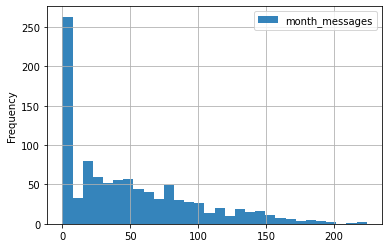

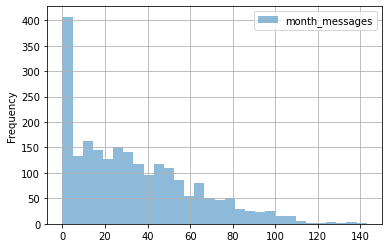

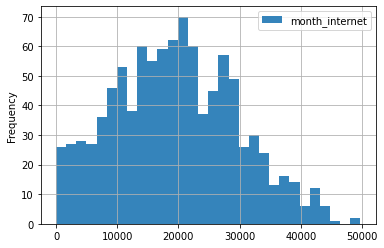

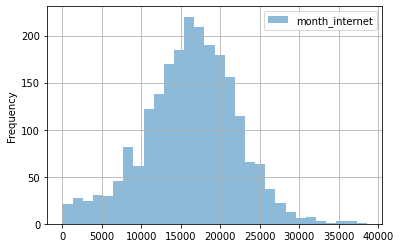

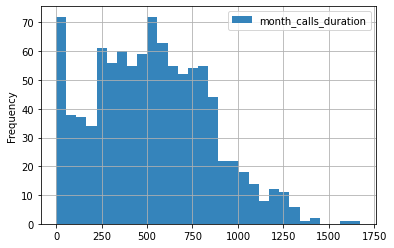

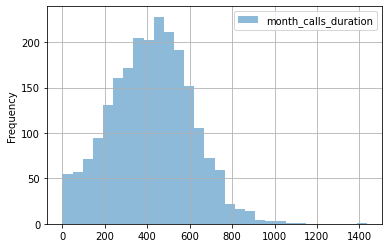

In [48]:
import matplotlib.pyplot as plt
to_research = ['month_messages', 'month_internet', 'month_calls_duration']
for col in to_research:

    revenue_users_ultra.plot(
    kind='hist',
    y=col,
    bins=30,
    linewidth=5,
    alpha=0.9,
    label=col,
    grid=True,
    legend=True,
) 
    revenue_users_smart.plot(
    kind='hist',
    y=col,
    bins=30,
    linewidth=5,
    alpha=0.5,
    label=col,
    grid=True,
    legend=True,
) 
    plt.show()


* Распределения использования сообщений для обоих тарифов похожи. Много нулевых значений, пик в районе 10-20 сообщений, дальше частота снижается. В тарифе Смарт в целом отправляют больше сообщений, возможно это связано с меньшим пакетом интренет траффика.
* Гистограмма использования интренета для тарифа Смарт больше напоминает нормальное распределние. Пик приходится на 16-18 гб в месяц. В тарифе Ультра пик приходится на 21 гб, при этом распределение несколько расплывается по оси и имеет еще пики на 10 и 30 гб.
* Похожая ситуация и с использованными звонками. В тарифе Смарт наибольшее количество человек расходуют примерно 500 минут (максимум тарифа) и распределние выглядит похожим на нормальное. А в тарифе Ультра два пика на 0 и на 500 минутах. Возможно, это связано с тем, что этот тариф больше используют для интеренета, чем для звонков и сообщений.

In [49]:
to_research = ['month_messages', 'month_internet', 'month_calls_duration']
print('\nСообщения Ультра\n',revenue_users_ultra['month_messages'].describe())
print('\nСообщения Смарт\n',revenue_users_smart['month_messages'].describe())


Сообщения Ультра
 count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: month_messages, dtype: float64

Сообщения Смарт
 count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: month_messages, dtype: float64


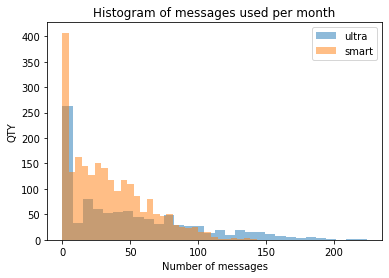

In [50]:
# Построим для одного параметра
plt.hist(revenue_users_ultra['month_messages'], bins = 30, alpha=0.5, label='ultra')
plt.hist(revenue_users_smart['month_messages'], bins = 30, alpha=0.5, label='smart')
plt.legend(loc='upper right')
#plt.show()
plt.title("Histogram of messages used per month")
plt.xlabel("Number of messages")
plt.ylabel("QTY")
plt.show()

In [67]:
# Код ревьюера
revenue_users[['month_calls_duration', 'month_messages', 'month_internet', 'tariff']].groupby('tariff').describe().T

tariff                             smart         ultra
month_calls_duration count   2229.000000    985.000000
                     mean     417.934948    526.623350
                     std      190.313730    317.606098
                     min        0.000000      0.000000
                     25%      282.000000    284.000000
                     50%      422.000000    518.000000
                     75%      545.000000    752.000000
                     max     1435.000000   1673.000000
month_messages       count   2229.000000    985.000000
                     mean      33.384029     49.363452
                     std       28.227876     47.804457
                     min        0.000000      0.000000
                     25%       10.000000      6.000000
                     50%       28.000000     38.000000
                     75%       51.000000     79.000000
                     max      143.000000    224.000000
month_internet       count   2229.000000    985.000000
                     mean   16208.386990  19468.805208
                     std     5870.476681  10087.170752
                     min        0.000000      0.000000
                     25%    12643.010000  11770.260000
                     50%    16506.840000  19308.010000
                     75%    20042.930000  26837.690000
                     max    38552.450000  49745.690000

## Проверка гипотез

Проверьте гипотезы
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Пороговое значение alpha задайте самостоятельно.

Поясните:
* как вы формулировали нулевую и альтернативную гипотезы;
* какой критерий использовали для проверки гипотез и почему.

Нам нужно проверить, что средние двух генеральных совокупностей не равны.
Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна. Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» больше, чем у «Смарт».
В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: 
scipy.stats.ttest_ind (array1, array2, equal_var). Применим его для наших выборок.  
Пороговое значение alpha примем равным 0.05

In [52]:
display(revenue_users_ultra['month_revenue'].count())
display(revenue_users_smart['month_revenue'].count())

985

2229

In [53]:
from scipy import stats as st
import numpy as np
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
#Так как размеры выборок не равны и скорее всего дисперсия для разных тарифов отличается параметр equal_var укажем как False
revenue_ultra = revenue_users_ultra['month_revenue']
revenue_smart = revenue_users_smart['month_revenue']
results = st.ttest_ind(revenue_ultra, revenue_smart,equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Следовательно, по выборке можно сделать вывод, что средняя выручка пользователей двух тарифов действительно различается.

Перейдем ко второй гипотезе. Нам нужно проверить, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Нулевая гипотеза: средняя выручка пользователей пользователей из Москвы и других регионов равна. Альтернативная гипотеза: средняя выручка пользователей из Москвы и других регионов не равна. Сначала нам нужно добавить столбец с характеристикой региона: "Москва", "Другой регион".

In [54]:
revenue_users['region'] = revenue_users['city'].where(revenue_users['city'] == 'Москва','Другой') 

In [55]:
revenue_users.head()

,user_id,month,month_calls_duration,month_calls_qty,month_messages,month_internet,age,churn_date,city,first_name,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,over_minutes,over_messages,over_internet_gb,month_revenue,region
0,1000,5,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,...,1950,150,1,1,ultra,0.0,0.0,0,1950.0,Другой
1,1000,6,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,...,1950,150,1,1,ultra,0.0,0.0,0,1950.0,Другой
2,1000,7,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,...,1950,150,1,1,ultra,0.0,0.0,0,1950.0,Другой
3,1000,8,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,...,1950,150,1,1,ultra,0.0,0.0,0,1950.0,Другой
4,1000,9,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,...,1950,150,1,1,ultra,0.0,0.0,0,1950.0,Другой


In [56]:
revenue_users_msk = revenue_users.query('region == "Москва"') #сформируем выборки по признаку региона и проверим их размер
revenue_users_other = revenue_users.query('region == "Другой"')
display(revenue_users_msk['month_revenue'].count())
display(revenue_users_other['month_revenue'].count())

611

2603

In [57]:
#посмотрим также средние значения выборок
display(revenue_users_msk['month_revenue'].mean())
display(revenue_users_other['month_revenue'].mean())

1546.7135842880523

1524.9362274298885

In [58]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
#Так как размеры выборок не равны и скорее всего дисперсия для разных тарифов отличается параметр equal_var укажем как False
revenue_msk = revenue_users_msk['month_revenue']
revenue_other = revenue_users_other['month_revenue']
results = st.ttest_ind(revenue_msk, revenue_other,equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Следовательно, по выборке нельзя сделать вывод, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Общий вывод

В ходе данного исследования была проведена предобработка данных:
* проверка на аномалии и исправления,
* изменение типов данных
* добавление нужной информации.

Далее было описано поведение клиентов оператора, рассчитана помесячная выручка с каждого клиента. Посчитано среднее количество, дисперсию и стандартное отклонение использованных минут, сообщений и мегабайт траффика. Наконец, были проверены гипотезы о том что
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Первая гипотеза подтвердилась, вторая нет.
Таким образом, более выгодным для оператора на основании проведенного исследования выборки является тариф "Ультра".